<a href="https://colab.research.google.com/github/Divs2930/Credit-Card-Fraud-Detection-Machine-Learning-Model/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CREDIT CARD FRAUD DETECTION***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the Dependencies**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading the dataset
df = pd.read_csv('/content/drive/MyDrive/ML Projects /Credit Card Fraud Detection /DataSet/creditcard.csv')

In [5]:
# printing first 5 rows of dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# last 5 rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
df.shape

(284807, 31)

In [8]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

***Preprocessing the Data***

Handling Missing Values...

In [9]:
# Checking for no of missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Hence we can see there are no missing values so we will move on to next step

In [10]:
# Displaying Stats about data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


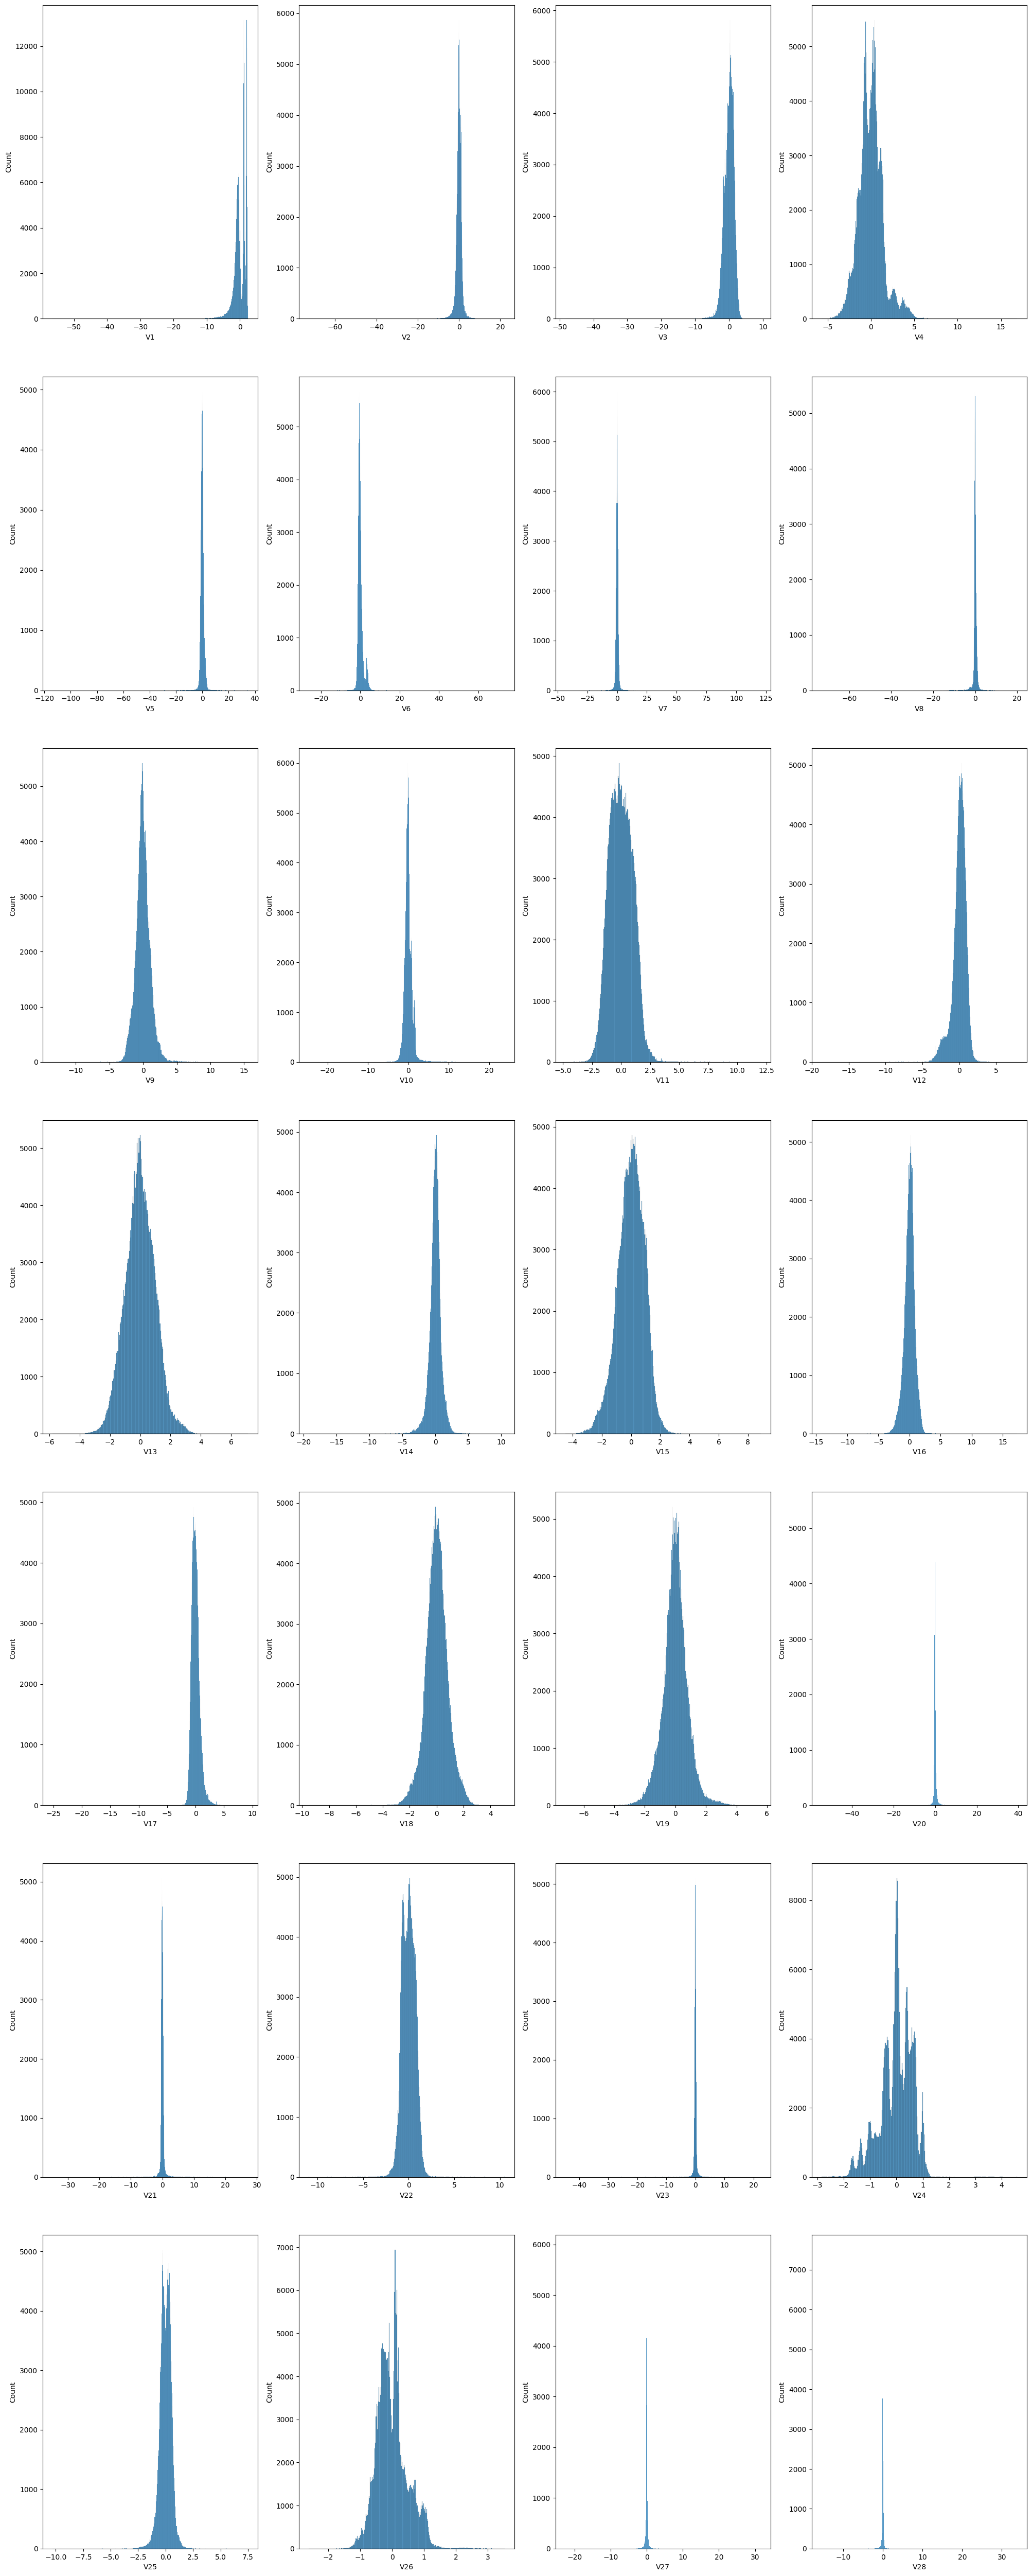

In [11]:
# Separating time amount and class column so that we can work on rest of the features
df_temp = df.drop(columns=['Time','Amount','Class'], axis=1)
# Creating dist plots
fig, ax = plt.subplots(ncols=4,nrows=7, figsize=(20,50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.histplot(df_temp[col], ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

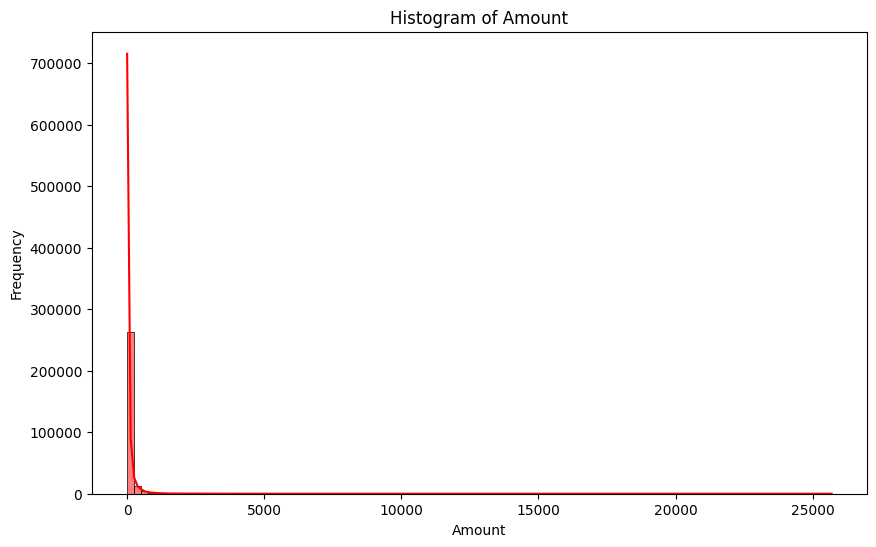

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=100, kde=True, color='red')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')
plt.show()

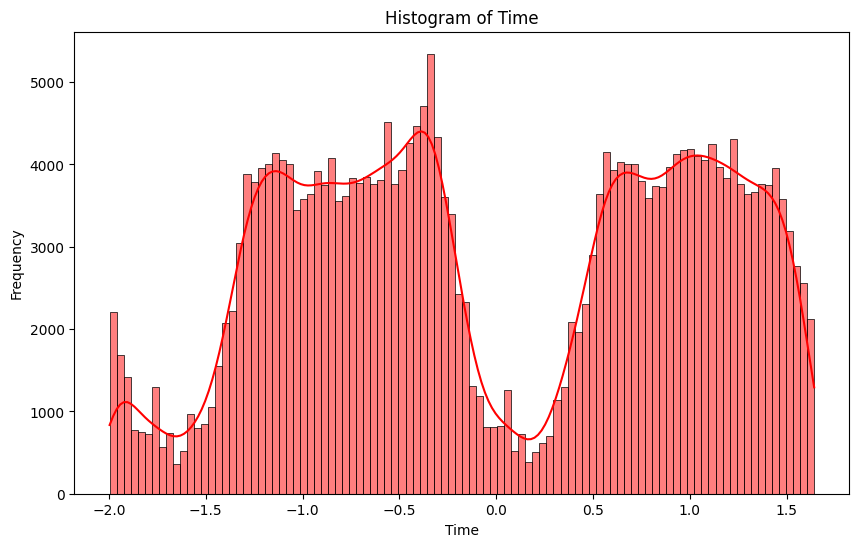

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=100, kde=True, color='red')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Time')
plt.show()

Now we can see that **Amount** and **Time** column is varying so we will use feature scaling on it

and for the rest of the features there is no need to scale them as they are in fine range

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Amount', 'Time']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


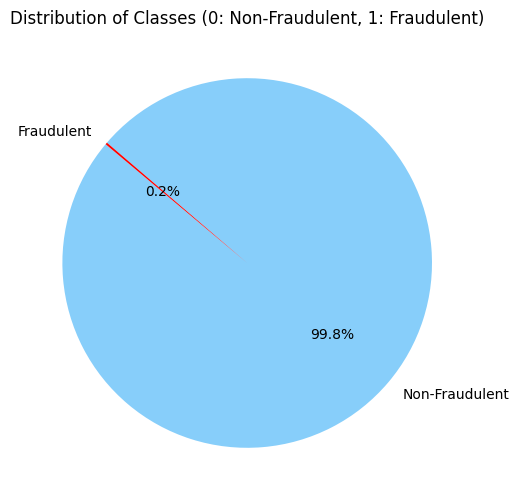

In [16]:
class_counts = df['Class'].value_counts()
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%', startangle=140, colors = ['lightskyblue', 'red'])
plt.title('Distribution of Classes (0: Non-Fraudulent, 1: Fraudulent)')
plt.show()

In [17]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The dataset is highly unbalanced because more than 99% of transaction were normal

**0 -->Normal Transaction**

**1 --> Fraudulent Transaction**

In [18]:
# Separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [19]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [20]:
# Stats for the data
legit.Amount.describe()

count    284315.000000
mean         -0.000234
std           0.999942
min          -0.353229
25%          -0.330640
50%          -0.265271
75%          -0.045177
max         102.362243
Name: Amount, dtype: float64

In [21]:
fraud.Amount.describe()

count    492.000000
mean       0.135382
std        1.026242
min       -0.353229
25%       -0.349231
50%       -0.316247
75%        0.070128
max        8.146182
Name: Amount, dtype: float64

**Now we have 2 data i.e,**

**-->legit**

**-->fraud**

In [22]:
# Comparing the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.000513,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,-0.000234
1,-0.296223,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382


# ***Visualisation of Data***

Fraud and Legit Transactions

In [23]:
df['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

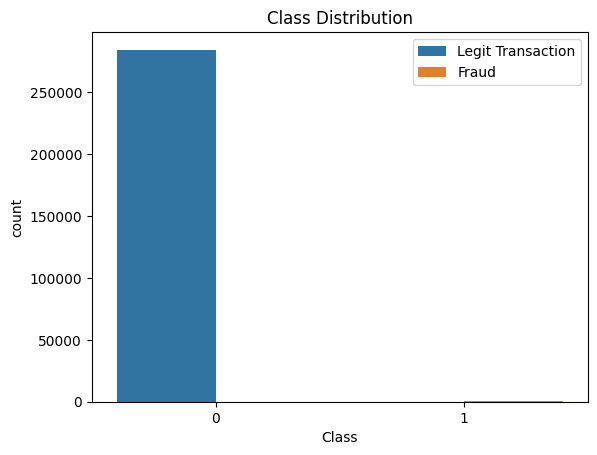

In [24]:
sns.countplot(data=df, x='Class', hue='Class')
plt.legend(labels=['Legit Transaction', 'Fraud'])
plt.title('Class Distribution')
plt.show()

Correlation Matrix HeatMap

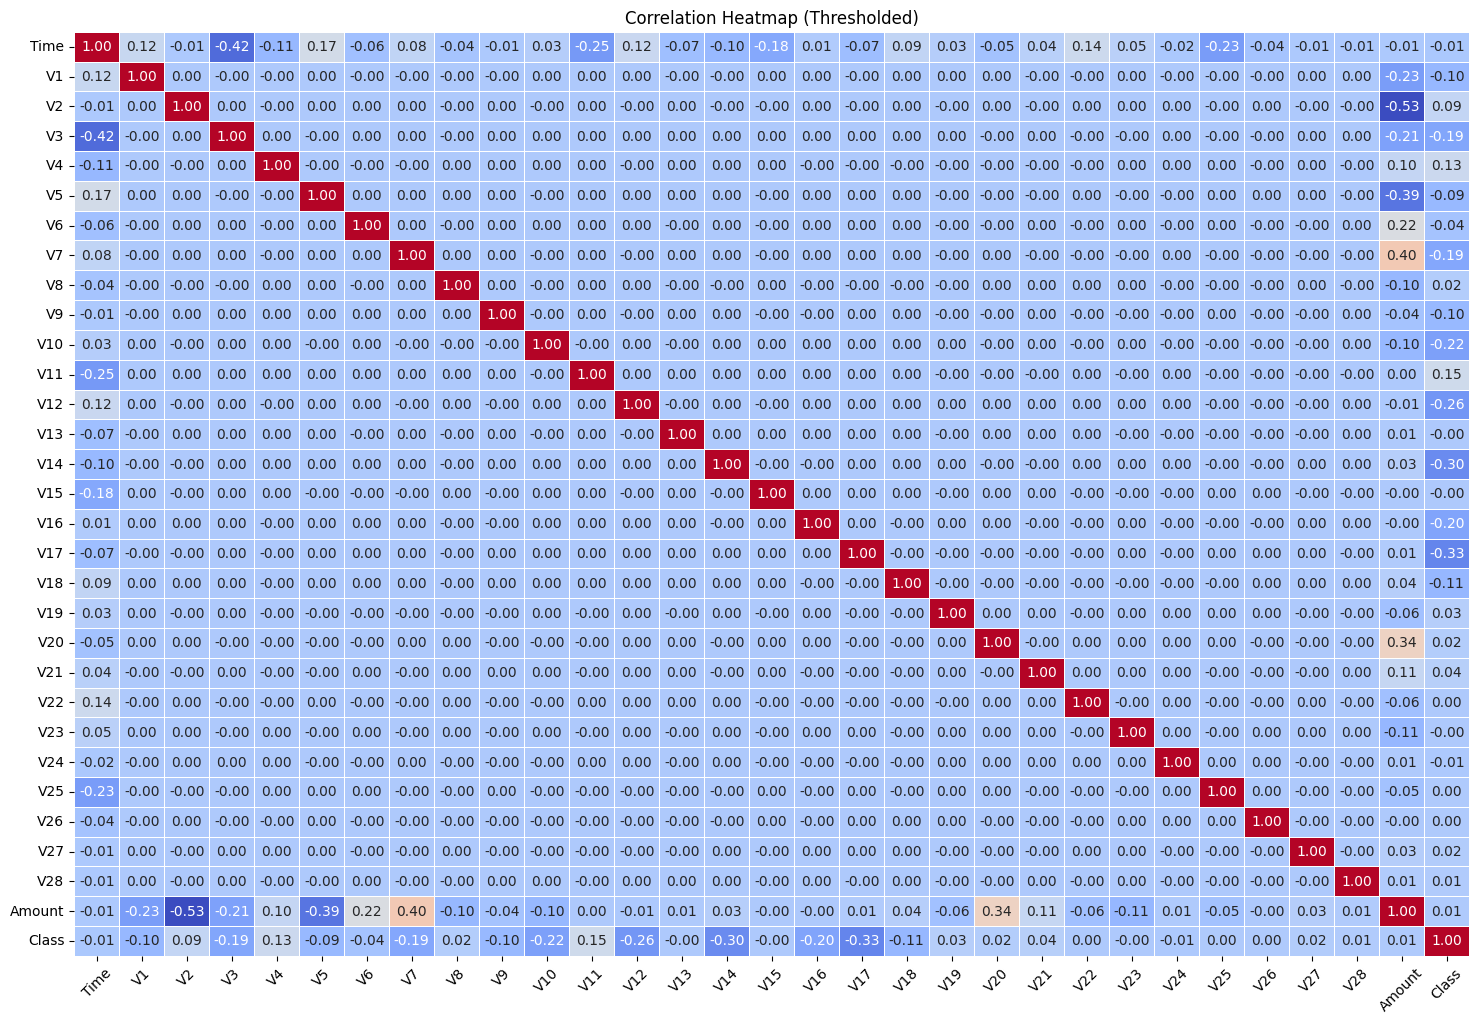

In [25]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a larger figure size
plt.figure(figsize=(18, 12))

# Rotate axis labels
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 10}, cbar=False)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.title('Correlation Heatmap (Thresholded)')
plt.show()

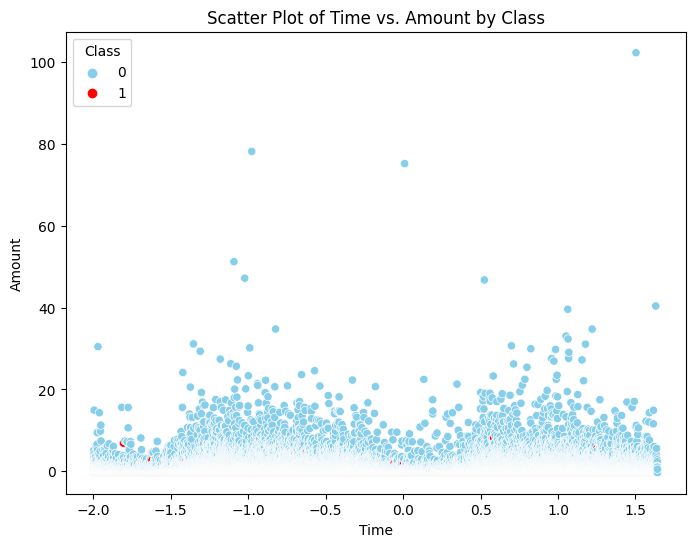

In [26]:
plt.figure(figsize=(8, 6))

# Define a custom color palette
custom_palette = {0: 'skyblue', 1: 'red'}

sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, palette=custom_palette, alpha=1.0)
plt.title('Scatter Plot of Time vs. Amount by Class')
plt.show()

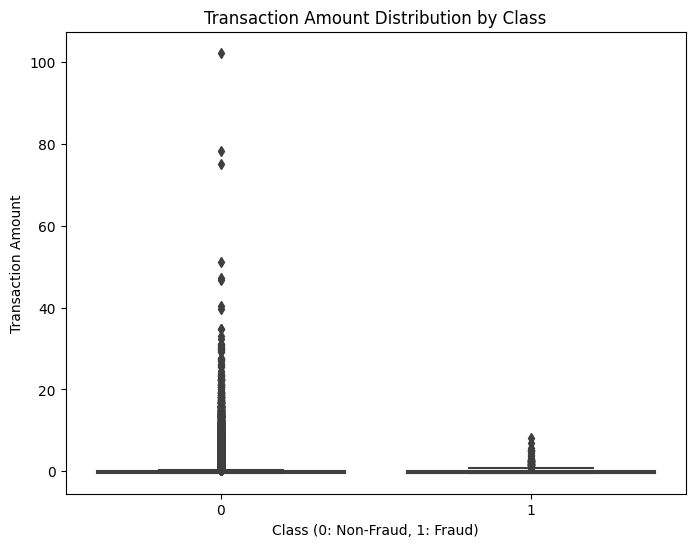

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Distribution by Class')
plt.show()

<ipython-input-28-953a564e10b0>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Legit', shade=True)
<ipython-input-28-953a564e10b0>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraud', shade=True)


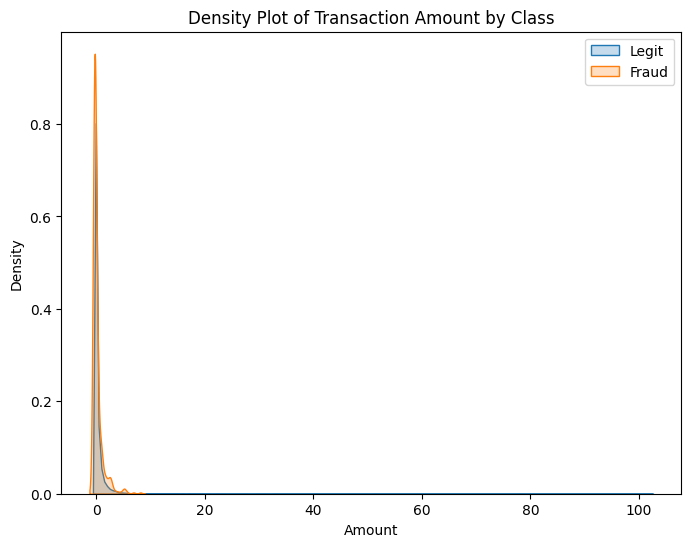

In [28]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Legit', shade=True)
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraud', shade=True)
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.title('Density Plot of Transaction Amount by Class')
plt.show()

# **Not Handling the data**

direct training our model with unbalanced dataset

In [29]:
# X is input features Y is Target Values
X = df.drop(columns='Class', axis=1)
Y = df['Class']

In [30]:
print(X)
print(Y)

            Time         V1         V2        V3        V4        V5  \
0      -1.996583  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1      -1.996583   1.191857   0.266151  0.166480  0.448154  0.060018   
2      -1.996562  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3      -1.996562  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4      -1.996541  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  1.641931 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  1.641952  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  1.641974   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  1.641974  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  1.642058  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify= Y, random_state= 42)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(284807, 30) (227845, 30) (56962, 30)




> **Logistic Regression**



In [33]:
LR_1 = LogisticRegression(max_iter=1000)

In [34]:
# training the Logistic Regression Model with training data
LR_1.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [35]:
Y_pred = LR_1.predict(X_test)
print(classification_report(Y_test,Y_pred))
print("F1 Score: ", f1_score(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score:  0.7314285714285713




> **Decision Tree Classifier**


In [36]:
from sklearn.tree import DecisionTreeClassifier
dt_1 = DecisionTreeClassifier()
dt_1.fit(X_train, Y_train)

DecisionTreeClassifier()

In [37]:
Y_pred2 = dt_1.predict(X_test)
print(classification_report(Y_test,Y_pred2))
print("F1 Score: ", f1_score(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.74      0.72        98

    accuracy                           1.00     56962
   macro avg       0.85      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score:  0.7227722772277229


> **Random Forest Classifier Model**

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_1 = RandomForestClassifier()
rf_1.fit(X_train, Y_train)

RandomForestClassifier()

In [69]:
Y_pred3 = rf_1.predict(X_test)
print(classification_report(Y_test,Y_pred3))
print("F1 Score: ", f1_score(Y_test,Y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score:  0.8743169398907105


In [70]:
# Generate classification reports
reports_1 = []
models_1 = ['LR', 'DT', 'RF']
for model_1, pred_1 in zip(models_1, [Y_pred, Y_pred2, Y_pred3]):
    report_1 = classification_report(Y_test, pred_1, output_dict=True)
    report_1['Model_1'] = model_1
    reports_1.append(report_1)

# Create DataFrames
dfs_1 = []
for report_1 in reports_1:
    df_1 = pd.DataFrame(report_1).transpose()
    dfs_1.append(df_1)

# Display DataFrames
for df_1 in dfs_1:
    display(df_1)

,precision,recall,f1-score,support
0,0.999402,0.999771,0.999587,56864.0
1,0.831169,0.653061,0.731429,98.0
accuracy,0.999175,0.999175,0.999175,0.999175
macro avg,0.915286,0.826416,0.865508,56962.0
weighted avg,0.999113,0.999175,0.999125,56962.0
Model_1,LR,LR,LR,LR


,precision,recall,f1-score,support
0,0.99956,0.999455,0.999508,56864.0
1,0.701923,0.744898,0.722772,98.0
accuracy,0.999017,0.999017,0.999017,0.999017
macro avg,0.850742,0.872176,0.86114,56962.0
weighted avg,0.999048,0.999017,0.999031,56962.0
Model_1,DT,DT,DT,DT


,precision,recall,f1-score,support
0,0.999684,0.999912,0.999798,56864.0
1,0.941176,0.816327,0.874317,98.0
accuracy,0.999596,0.999596,0.999596,0.999596
macro avg,0.97043,0.908119,0.937057,56962.0
weighted avg,0.999583,0.999596,0.999582,56962.0
Model_1,RF,RF,RF,RF


# **UnderSampling**

So we sample dataset containing similar distribution of legit and fraud transactions

No of fraudulent transaction is 492

In [38]:
# getting random sample data from legit transactions only 492 entries
legit_sample = legit.sample(n=492)

In [39]:
# merging legit sample and fraud dataset to a new dataframe
undersampled_df = pd.concat([legit_sample, fraud], axis=0)

In [40]:
undersampled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
243581,1.203884,2.209364,-0.434139,-1.814150,-0.634910,-0.315186,-1.574853,-0.148093,-0.406024,-0.465705,...,-0.047538,-0.105598,0.167489,-0.129474,-0.017294,-0.275701,-0.028223,-0.037046,-0.293258,0
105614,-0.530657,-0.332706,0.051488,0.835705,-1.324733,0.220442,0.434992,-0.048931,0.081951,-1.561294,...,-0.427372,-0.882576,-0.176322,-1.383062,-0.404877,1.022074,-0.081223,0.127913,-0.257275,0
55915,-1.002986,-0.712031,0.803581,1.911877,-0.104714,-0.800520,0.176463,-0.451410,0.668806,-0.381946,...,0.443559,1.172508,-0.079335,0.070527,-0.609376,0.359642,0.038913,0.101479,-0.259314,0
17894,-1.385629,-1.147097,0.368128,-0.114039,-0.279361,-0.695381,-0.381989,1.687218,0.197078,-0.356179,...,0.220168,0.201489,0.583599,-0.109599,-0.163404,0.317198,0.122564,0.187119,0.873104,0
115910,-0.436865,1.093290,-1.623730,0.612344,-1.318870,-1.774265,-0.198725,-1.073942,0.081116,-1.962807,...,-0.184961,-0.568868,0.086634,0.160806,-0.073806,-0.425565,0.022767,0.044984,0.337040,0


In [41]:
undersampled_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,1.565196,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.569513,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,1.569597,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,1.582548,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1
281674,1.590592,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,-0.183191,1


In [42]:
undersampled_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [43]:
undersampled_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.009567,0.077783,-0.032834,0.022580,0.027267,0.007480,0.143529,0.087983,0.047142,0.002854,...,0.017138,0.007375,-0.000487,0.017219,0.020958,-0.036596,-0.002622,-0.001072,0.010378,0.082036
1,-0.296223,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382


**Splitting the data into features and targets**

In [44]:
# X_US is input features Y_US is Target Values
X_US = undersampled_df.drop(columns='Class', axis=1)
Y_US = undersampled_df['Class']

**Model Training**

In [45]:
print(f'Input Values:\n{X_US}')
print(f'Target Values:\n{Y_US}')

Input Values:
            Time        V1        V2        V3        V4        V5        V6  \
243581  1.203884  2.209364 -0.434139 -1.814150 -0.634910 -0.315186 -1.574853   
105614 -0.530657 -0.332706  0.051488  0.835705 -1.324733  0.220442  0.434992   
55915  -1.002986 -0.712031  0.803581  1.911877 -0.104714 -0.800520  0.176463   
17894  -1.385629 -1.147097  0.368128 -0.114039 -0.279361 -0.695381 -0.381989   
115910 -0.436865  1.093290 -1.623730  0.612344 -1.318870 -1.774265 -0.198725   
...          ...       ...       ...       ...       ...       ...       ...   
279863  1.565196 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  1.569513  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  1.569597 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  1.582548 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  1.590592  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V

**To split the data into Training Data and Testing Data**

In [46]:
X_US_train, X_US_test, Y_US_train, Y_US_test = train_test_split(X_US, Y_US, test_size= 0.2, stratify= Y_US, random_state= 42)

In [47]:
print(X_US.shape, X_US_train.shape, X_US_test.shape)

(984, 30) (787, 30) (197, 30)




> **Logistic Regression**





In [48]:
LR_2 = LogisticRegression(max_iter=1000)

In [49]:
# training the Logistic Regression Model with training data
LR_2.fit(X_US_train, Y_US_train)

LogisticRegression(max_iter=1000)

Evaluation of Model


In [50]:
Y_US_pred = LR_2.predict(X_US_test)
print(classification_report(Y_US_test,Y_US_pred))
print("F1 Score:", f1_score(Y_US_test,Y_US_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.98      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

F1 Score: 0.9637305699481866






> **Decision Tree Classifier Model**









In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_2 = DecisionTreeClassifier()
dt_2.fit(X_US_train, Y_US_train)

DecisionTreeClassifier()

In [52]:
Y_US_pred2 = dt_2.predict(X_US_test)
print(classification_report(Y_US_test,Y_US_pred2))
print("F1 Score:", f1_score(Y_US_test,Y_US_pred2))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        99
           1       0.94      0.95      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

F1 Score: 0.9441624365482234




> **Random Forest Classifier Model**




In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_2 = RandomForestClassifier()
rf_2.fit(X_US_train, Y_US_train)

RandomForestClassifier()

In [54]:
Y_US_pred3 = rf_2.predict(X_US_test)
print(classification_report(Y_US_test,Y_US_pred3))
print("F1 Score:", f1_score(Y_US_test,Y_US_pred3))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        99
           1       0.99      0.95      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197

F1 Score: 0.96875


In [55]:
# Generate classification reports
reports_2 = []
models_2 = ['LR', 'DT', 'RF']
for model_2, pred_2 in zip(models_2, [Y_US_pred, Y_US_pred2, Y_US_pred3]):
    report_2 = classification_report(Y_US_test, pred_2, output_dict=True)
    report_2['Model_2'] = model_2
    reports_2.append(report_2)

# Create DataFrames
dfs_2 = []
for report_2 in reports_2:
    df_2 = pd.DataFrame(report_2).transpose()
    dfs_2.append(df_2)

# Display DataFrames
for df_2 in dfs_2:
    display(df_2)

,precision,recall,f1-score,support
0,0.95098,0.979798,0.965174,99.0
1,0.978947,0.94898,0.963731,98.0
accuracy,0.964467,0.964467,0.964467,0.964467
macro avg,0.964964,0.964389,0.964452,197.0
weighted avg,0.964893,0.964467,0.964456,197.0
Model_2,LR,LR,LR,LR


,precision,recall,f1-score,support
0,0.94898,0.939394,0.944162,99.0
1,0.939394,0.94898,0.944162,98.0
accuracy,0.944162,0.944162,0.944162,0.944162
macro avg,0.944187,0.944187,0.944162,197.0
weighted avg,0.944211,0.944162,0.944162,197.0
Model_2,DT,DT,DT,DT


,precision,recall,f1-score,support
0,0.951456,0.989899,0.970297,99.0
1,0.989362,0.94898,0.96875,98.0
accuracy,0.969543,0.969543,0.969543,0.969543
macro avg,0.970409,0.969439,0.969524,197.0
weighted avg,0.970313,0.969543,0.969527,197.0
Model_2,RF,RF,RF,RF


# OverSampling the data


*   Oversampling is a resampling
technique that aims to balance the class distribution of a dataset by increasing the number of examples in the minority class


In [56]:
X2 = df.drop('Class', axis=1)
Y2 = df['Class']

In [57]:
X2.shape

(284807, 30)

In [58]:
Y2.shape

(284807,)

In [59]:
from imblearn.over_sampling import SMOTE
X_OS,Y_OS = SMOTE().fit_resample(X2,Y2)

OverSampling Achieved

In [60]:
Y_OS.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [61]:
X_OS_train, X_OS_test, Y_OS_train, Y_OS_test = train_test_split(X_OS, Y_OS, test_size= 0.2, stratify= Y_OS, random_state= 42)
print(X_OS.shape, X_OS_train.shape, X_OS_test.shape)

(568630, 30) (454904, 30) (113726, 30)




> Logistic Regression



In [62]:
model_3 = LogisticRegression(max_iter=1000)

In [63]:
# training the Logistic Regression Model with training data
model_3.fit(X_OS_train, Y_OS_train)

LogisticRegression(max_iter=1000)

In [64]:
Y_OS_pred = model_3.predict(X_OS_test)
print(classification_report(Y_OS_test,Y_OS_pred))
print("F1 Score:", f1_score(Y_OS_test,Y_OS_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

F1 Score: 0.9471040936517685




> **Decision Tree Model**





In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_3 = DecisionTreeClassifier()
dt_3.fit(X_OS_train, Y_OS_train)

DecisionTreeClassifier()

In [66]:
Y_OS_pred2 = dt_3.predict(X_OS_test)
print(classification_report(Y_OS_test,Y_OS_pred2))
print("F1 Score:", f1_score(Y_OS_test,Y_OS_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

F1 Score: 0.9981904745173135




> **Random Forest Classifier Model**




In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_3 = RandomForestClassifier()
rf_3.fit(X_OS_train, Y_OS_train)

RandomForestClassifier()

In [73]:
Y_OS_pred3 = rf_3.predict(X_OS_test)
print(classification_report(Y_OS_test,Y_OS_pred3))
print("F1 Score:", f1_score(Y_OS_test,Y_OS_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

F1 Score: 0.9998769122560226


In [74]:
# Generate classification reports
reports_3 = []
models_3 = ['LR', 'DT', 'RF']
for model_3, pred_2 in zip(models_3, [Y_US_pred, Y_US_pred2, Y_US_pred3]):
    report_3 = classification_report(Y_US_test, pred_2, output_dict=True)
    report_3['Model_3'] = model_3
    reports_3.append(report_3)

# Create DataFrames
dfs_3 = []
for report_3 in reports_3:
    df_3 = pd.DataFrame(report_3).transpose()
    dfs_3.append(df_3)

# Display DataFrames
for df_3 in dfs_3:
    display(df_3)

,precision,recall,f1-score,support
0,0.95098,0.979798,0.965174,99.0
1,0.978947,0.94898,0.963731,98.0
accuracy,0.964467,0.964467,0.964467,0.964467
macro avg,0.964964,0.964389,0.964452,197.0
weighted avg,0.964893,0.964467,0.964456,197.0
Model_3,LR,LR,LR,LR


,precision,recall,f1-score,support
0,0.94898,0.939394,0.944162,99.0
1,0.939394,0.94898,0.944162,98.0
accuracy,0.944162,0.944162,0.944162,0.944162
macro avg,0.944187,0.944187,0.944162,197.0
weighted avg,0.944211,0.944162,0.944162,197.0
Model_3,DT,DT,DT,DT


,precision,recall,f1-score,support
0,0.951456,0.989899,0.970297,99.0
1,0.989362,0.94898,0.96875,98.0
accuracy,0.969543,0.969543,0.969543,0.969543
macro avg,0.970409,0.969439,0.969524,197.0
weighted avg,0.970313,0.969543,0.969527,197.0
Model_3,RF,RF,RF,RF


# Comparing the models

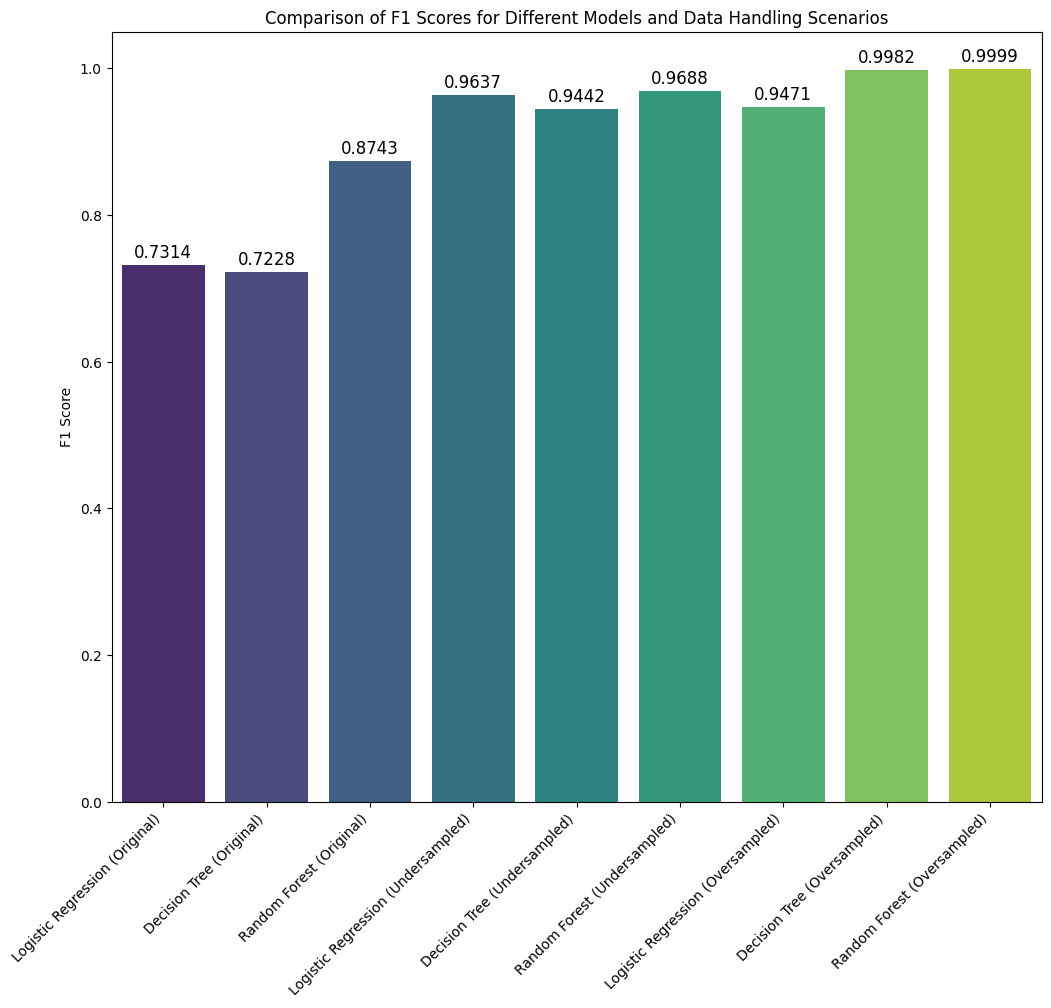

In [78]:
# F1 scores for models in different scenarios
f1_scores = {
    'Logistic Regression (Original)': [f1_score(Y_test, Y_pred)],
    'Decision Tree (Original)': [f1_score(Y_test, Y_pred2)],
    'Random Forest (Original)': [f1_score(Y_test, Y_pred3)],
    'Logistic Regression (Undersampled)': [f1_score(Y_US_test, Y_US_pred)],
    'Decision Tree (Undersampled)': [f1_score(Y_US_test, Y_US_pred2)],
    'Random Forest (Undersampled)': [f1_score(Y_US_test, Y_US_pred3)],
    'Logistic Regression (Oversampled)': [f1_score(Y_OS_test, Y_OS_pred)],
    'Decision Tree (Oversampled)': [f1_score(Y_OS_test, Y_OS_pred2)],
    'Random Forest (Oversampled)': [f1_score(Y_OS_test, Y_OS_pred3)]
}

# Create a DataFrame from the F1 scores
f1_scores_df = pd.DataFrame(f1_scores)

# Plot the F1 scores using a bar chart
plt.figure(figsize=(12, 10))
ax = sns.barplot(data=f1_scores_df, palette="viridis")
plt.title('Comparison of F1 Scores for Different Models and Data Handling Scenarios')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                size=12,
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()
